In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

# month
dates = pd.date_range(start='2025-01-01', end='2025-12-31', freq='MS')
print("Created Dates:", dates)

Created Dates: DatetimeIndex(['2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01',
               '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01',
               '2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01'],
              dtype='datetime64[ns]', freq='MS')


In [6]:
from utils import generate_random_sales

product_A = generate_random_sales(50, 100, 12)
product_B = generate_random_sales(30, 80, 12)
product_C = generate_random_sales(20, 60, 12)
product_D = generate_random_sales(10, 50, 12)

print("product_A", product_A)
print("product_B", product_B)
print("product_C", product_C)
print("product_D", product_D)

1 : Q1
4 : Q2
7 : Q3
10 : Q4
12 : Q4
product_A [77 95 95 76 73 80 56 94 81 80 99 90]
product_B [67 43 34 45 69 37 57 60 72 40 48 34]
product_C [42 33 49 38 34 46 27 35 35 20 52 31]
product_D [31 22 33 34 14 43 33 45 39 10 38 13]


In [7]:
#CREATR INITIAL DATA FRAM
initial = pd.DataFrame({
    'Date': dates,
    'product_A': product_A,
    'product_B': product_B,
    'product_C': product_C,
    'product_D': product_D
}) 

#Save initial dataset
initial.to_csv('data/initial.csv', index=False)

In [8]:
#creat Datafram
df = initial.copy()
df['Month'] = df['Date'].dt.month_name()
#2  TOTAL SALES
df['Total_Sales'] = df[['product_A','product_B','product_C','product_D' ]].sum(axis=1)
print('creat total sales')

# average
df['Average_Sales']= df[['product_A','product_B','product_C','product_D' ]].mean(axis=1)
print('creat average sales')

#month over growth nsba 100
df['Month_over_Month_Growth'] = df['Total_Sales'].pct_change()*100
#pct_change nsb 100 byn month (month - befor_month)/befor_month   (.shift(1)) yn9s 1
print('creat monthly average sales')


creat total sales
creat average sales
creat monthly average sales


In [9]:

# assing each month a quarter
from utils import get_quarter
df['Quarter'] = df['Date'].dt.month.apply(get_quarter)
print('creat Quarter ')



creat Quarter 


In [10]:
#max
product = ['product_A','product_B','product_C','product_D']
df['Max_sales_product'] = df[product].idxmax(axis=1)
df['Min_sales_product'] = df[product].idxmin(axis=1)
print('creat max min product ')

df.to_csv('data/final.csv', index=False)
print ("enregistr")

creat max min product 
enregistr


In [11]:
#averge sale
print('Average sales per quarter per product')
pivot = df.pivot_table(
    values=product,
    index='Quarter',
    aggfunc='mean',
).round(2)
print(pivot)
#total
print('Total sales per quarter')
pivott = df.pivot_table(
    values= ['Total_Sales'],
    index='Quarter',
    aggfunc='sum',
).round(2)
print(pivott)

Average sales per quarter per product
         product_A  product_B  product_C  product_D
Quarter                                            
Q1           89.00      48.00      41.33      28.67
Q2           76.33      50.33      39.33      30.33
Q3           77.00      63.00      32.33      39.00
Q4           89.67      40.67      34.33      20.33
Total sales per quarter
         Total_Sales
Quarter             
Q1               621
Q2               589
Q3               634
Q4               555


In [12]:
#2
quarterly_total_sales = df.groupby('Quarter')['Total_Sales'].sum()
print(quarterly_total_sales)


Quarter
Q1    621
Q2    589
Q3    634
Q4    555
Name: Total_Sales, dtype: int64


In [13]:
with open('data/output.csv', 'w', encoding='utf-8') as f:
    f.write("Average Sales Per Quarter for Each Product:\n")
    pivot.to_csv(f)
    f.write("\nTotal Sales Per Quarter:\n")
    pivott.to_csv(f)
    f.write("\nTotal Sales Per Quarter:\n")
    quarterly_total_sales.to_csv(f)

    print('TRUE')

TRUE


In [14]:
#4.1
best_month = df.loc[df['Total_Sales'].idxmax()]
print(f"Best Month: {best_month['Month']}")
print(f"Total Sales: {best_month['Total_Sales']} units")
print(f"Best Product: {best_month['Max_sales_product']}")

#4.2
product_totals = df[['product_A', 'product_B','product_C', 'product_D']].sum()
best_product = product_totals.idxmax()
best_product_sales = product_totals.max()

print(f"\n Best Product: {best_product}")
print(f"Annual Sales: {best_product_sales} units")
print(f"Contribution Percentage: {(best_product_sales / product_totals.sum() * 100):.1f}%")

#4.3
quarterly_totals = df.groupby('Quarter')['Total_Sales'].sum()
best_quarter = quarterly_totals.idxmax()
best_quarter_sales = quarterly_totals.max()

print(f"\n Best Quarter: {best_quarter}")
print(f" - Total Sales: {best_quarter_sales} units")
print(f" - Contribution Percentage: {(best_quarter_sales / quarterly_totals.sum() * 100):.1f}%")

Best Month: November
Total Sales: 237 units
Best Product: product_A

 Best Product: product_A
Annual Sales: 996 units
Contribution Percentage: 41.5%

 Best Quarter: Q3
 - Total Sales: 634 units
 - Contribution Percentage: 26.4%


In [15]:
with open('data/output.csv', 'a', encoding='utf-8') as f:
    f.write("\nKey Insights:\n")
    f.write(f"Best Month: {best_month['Month']} ({best_month['Total_Sales']} units)\n")
    f.write(f"Best Product: {best_product} ({best_product_sales} units)\n")
    f.write(f"Best Quarter: {best_quarter} ({best_quarter_sales} units)\n")

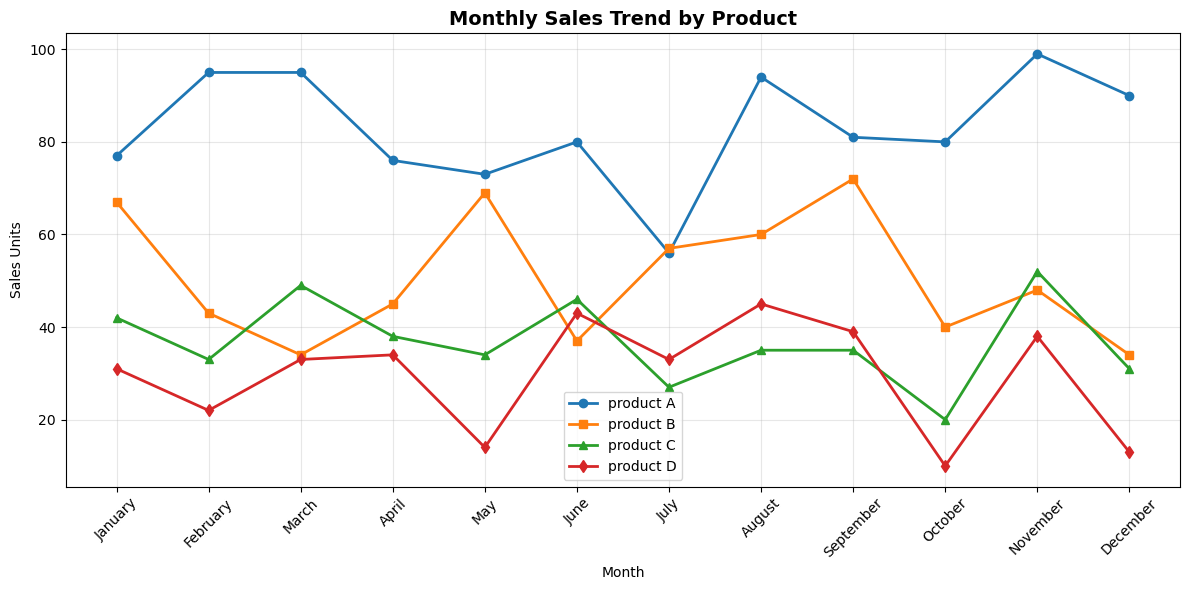

In [16]:
from matplotlib import pyplot as plt

#5.1
#Line chart for each product across months
plt.figure(figsize=(12, 6))
months = df['Month']

plt.plot(months, df['product_A'], marker='o', label='product A', linewidth=2)
plt.plot(months, df['product_B'], marker='s', label='product B', linewidth=2)
plt.plot(months, df['product_C'], marker='^', label='product C', linewidth=2)
plt.plot(months, df['product_D'], marker='d', label='product D', linewidth=2)

plt.title('Monthly Sales Trend by Product', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Sales Units')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('sales_trend.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

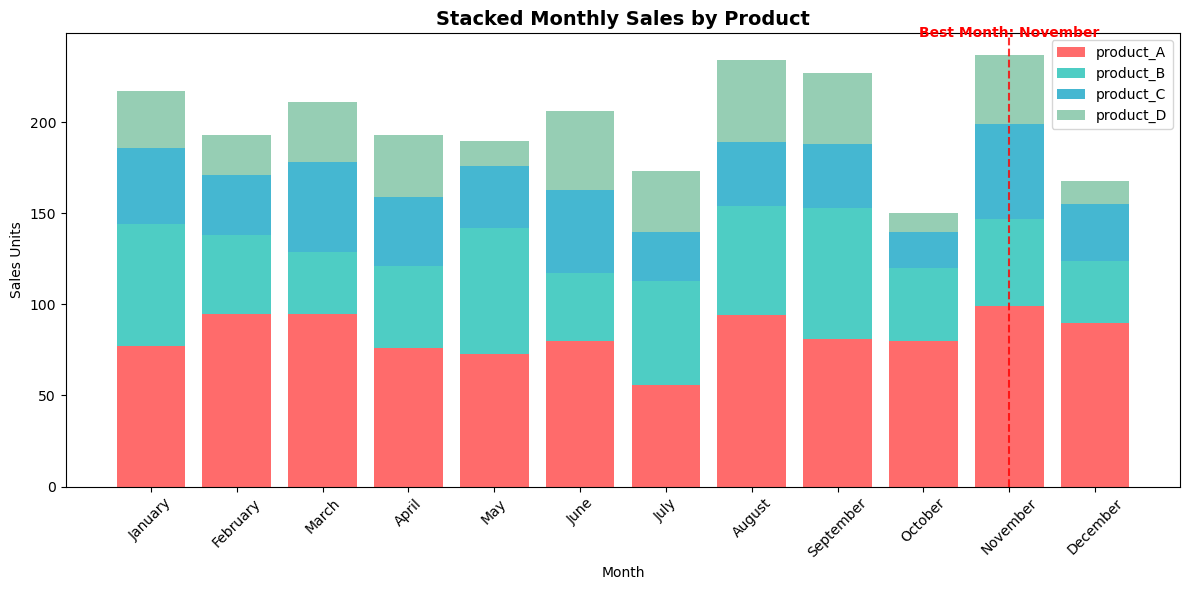

In [17]:
#5.2
# Stacked bar chart of total monthly sales by product
plt.figure(figsize=(12, 6))

bar_width = 0.8
bottom = np.zeros(len(df))

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
products = ['product_A', 'product_B', 'product_C', 'product_D']

for i, product in enumerate(products):
    plt.bar(df['Month'], df[product], bar_width, bottom=bottom,
            label=product, color=colors[i])
    bottom += df[product].values

# BEST MONTH
best_month_idx = df['Total_Sales'].idxmax()
best_month_name = df.loc[best_month_idx, 'Month']
best_month_sales = df.loc[best_month_idx, 'Total_Sales']

plt.axvline(x=best_month_idx, color='red', linestyle='--', alpha=0.8)
plt.text(best_month_idx, best_month_sales + 10, f'Best Month: {best_month_name}',
         ha='center', color='red', fontweight='bold')

plt.title('Stacked Monthly Sales by Product', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Sales Units')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('stacked_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

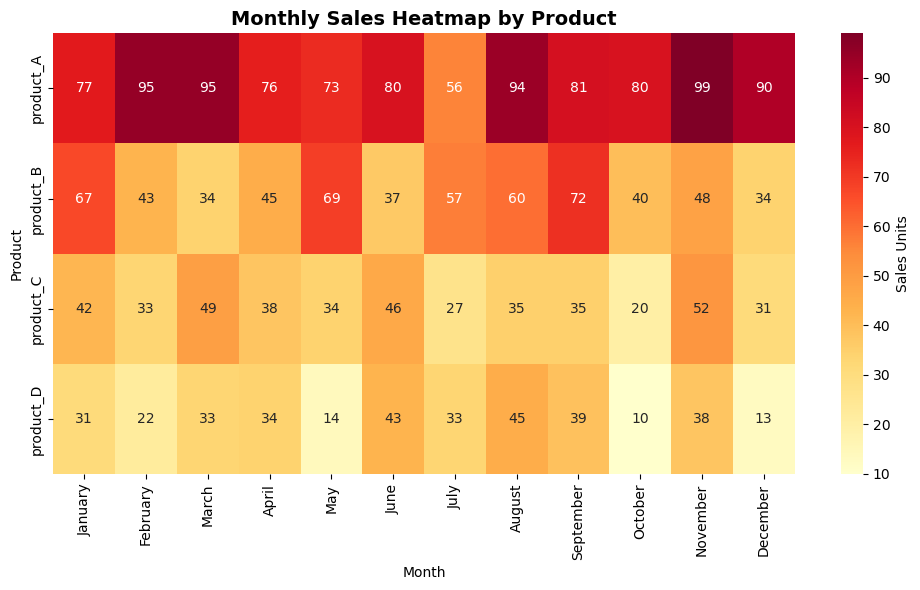

In [18]:
#5.3
# Seaborn heatmap: monthly sales of each product
plt.figure(figsize=(10, 6))

# تحضير البيانات للخريطة الحرارية
heatmap_data = df[['product_A', 'product_B', 'product_C', 'product_D']].copy()
heatmap_data.index = df['Month']

sns.heatmap(heatmap_data.T, annot=True, fmt='d', cmap='YlOrRd',
            cbar_kws={'label': 'Sales Units'})
plt.title('Monthly Sales Heatmap by Product', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Product')
plt.tight_layout()
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

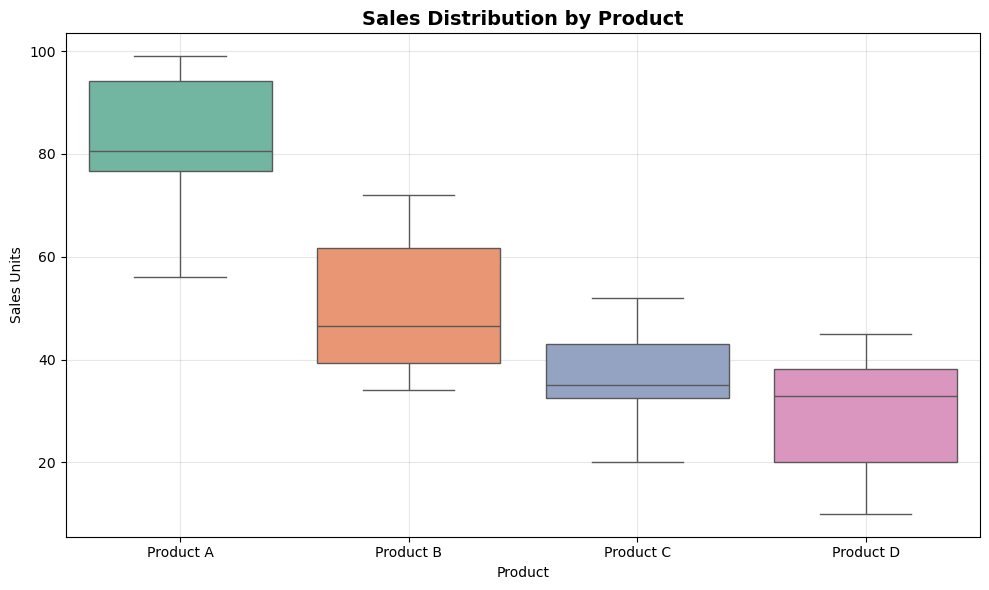

In [19]:
#5.4
# Seaborn boxplot: distribution of sales per product
plt.figure(figsize=(10, 6))

# تحضير البيانات لمخطط الصندوق
boxplot_data = df[['product_A', 'product_B', 'product_C', 'product_D']].copy()
boxplot_data.columns = ['Product A', 'Product B', 'Product C', 'Product D']

sns.boxplot(data=boxplot_data, palette='Set2')
plt.title('Sales Distribution by Product', fontsize=14, fontweight='bold')
plt.ylabel('Sales Units')
plt.xlabel('Product')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()